In [91]:
import random
import os
import math
import scipy.io.wavfile as wf
import numpy as np
import matplotlib.pyplot as plt
import wave as wav
import librosa
import soundfile
import base64
import hashlib
import json 
import time
import uuid
import requests
import scipy
import hmac
import json
from datetime import datetime
from time import mktime
from urllib.parse import urlencode
from wsgiref.handlers import format_date_time
from pydub import AudioSegment
import talentedsoft_copy as talentedsoft
#import scikits.audiolab
##科大讯飞声纹识别 tjs's 
APPId = "fcfefe42"
APISecret = "NmE5NTZkNzFlMzg3MGM0ZDBmZTdkODYx"
APIKey = "aba4d1c2815577b411d5d5a4966796aa"
class Gen_req_url(object):
    """生成请求的url"""

    def sha256base64(self, data):
        sha256 = hashlib.sha256()
        sha256.update(data)
        digest = base64.b64encode(sha256.digest()).decode(encoding='utf-8')
        return digest

    def parse_url(self, requset_url):
        stidx = requset_url.index("://")
        host = requset_url[stidx + 3:]
        # self.schema = requset_url[:stidx + 3]
        edidx = host.index("/")
        if edidx <= 0:
            raise Exception("invalid request url:" + requset_url)
        self.path = host[edidx:]
        self.host = host[:edidx]

    # build websocket auth request url
    def assemble_ws_auth_url(self, requset_url, api_key, api_secret, method="GET"):
        self.parse_url(requset_url)
        now = datetime.now()
        date = format_date_time(mktime(now.timetuple()))
        # date = "Thu, 12 Dec 2019 01:57:27 GMT"
        signature_origin = "host: {}\ndate: {}\n{} {} HTTP/1.1".format(self.host, date, method, self.path)
        signature_sha = hmac.new(api_secret.encode('utf-8'), signature_origin.encode('utf-8'),
                                 digestmod=hashlib.sha256).digest()
        signature_sha = base64.b64encode(signature_sha).decode(encoding='utf-8')
        authorization_origin = "api_key=\"%s\", algorithm=\"%s\", headers=\"%s\", signature=\"%s\"" % (
            api_key, "hmac-sha256", "host date request-line", signature_sha)
        authorization = base64.b64encode(authorization_origin.encode('utf-8')).decode(encoding='utf-8')
        values = {
            "host": self.host,
            "date": date,
            "authorization": authorization
        }

        return requset_url + "?" + urlencode(values)


def gen_req_body(apiname, APPId, file_path=None):
    """
    生成请求的body
    :param apiname
    :param APPId: Appid
    :param file_name:  文件路径
    :return:
    """
    if apiname == 'createFeature':

        with open(file_path, "rb") as f:
            audioBytes = f.read()
        body = {
            "header": {
                "app_id": APPId,
                "status": 3
            },
            "parameter": {
                "s782b4996": {
                    "func": "createFeature",
                    "groupId": "8",
                    "featureId": "cmu_scottish",
                    "featureInfo": "wav08",
                    "createFeatureRes": {
                        "encoding": "utf8",
                        "compress": "raw",
                        "format": "json"
                    }
                }
            },
            "payload": {
                "resource": {
                    "encoding": "lame",
                    "sample_rate": 16000,
                    "channels": 1,
                    "bit_depth": 16,
                    "status": 3,
                    "audio": str(base64.b64encode(audioBytes), 'UTF-8')
                }
            }
        }
    elif apiname == 'createGroup':

        body = {
            "header": {
                "app_id": APPId,
                "status": 3
            },
            "parameter": {
                "s782b4996": {
                    "func": "createGroup",
                    "groupId": "8",
                    "groupName": "cmu_dataset",
                    "groupInfo": "cmu_dataset",
                    "createGroupRes": {
                        "encoding": "utf8",
                        "compress": "raw",
                        "format": "json"
                    }
                }
            }
        }
   
    elif apiname == 'queryFeatureList':

        body = {
            "header": {
                "app_id": APPId,
                "status": 3
            },
            "parameter": {
                "s782b4996": {
                    "func": "queryFeatureList",
                    "groupId": "8",
                    "queryFeatureListRes": {
                        "encoding": "utf8",
                        "compress": "raw",
                        "format": "json"
                    }
                }
            }
        }
    elif apiname == 'searchFea':

        with open(file_path, "rb") as f:
            audioBytes = f.read()
        body = {
            "header": {
                "app_id": APPId,
                "status": 3
            },
            "parameter": {
                "s782b4996": {
                    "func": "searchFea",
                    "groupId": "8",
                    "topK": 10,
                    "searchFeaRes": {
                        "encoding": "utf8",
                        "compress": "raw",
                        "format": "json"
                    }
                }
            },
            "payload": {
                "resource": {
                    "encoding": "lame",
                    "sample_rate": 16000,
                    "channels": 1,
                    "bit_depth": 16,
                    "status": 3,
                    "audio": str(base64.b64encode(audioBytes), 'UTF-8')
                }
            }
        }
    elif apiname == 'searchScoreFea':

        with open(file_path, "rb") as f:
            audioBytes = f.read()
        body = {
            "header": {
                "app_id": APPId,
                "status": 3
            },
            "parameter": {
                "s782b4996": {
                    "func": "searchScoreFea",
                    "groupId": "iFLYTEK_examples_groupId",
                    "dstFeatureId": "p374",
                    "searchScoreFeaRes": {
                        "encoding": "utf8",
                        "compress": "raw",
                        "format": "json"
                    }
                }
            },
            "payload": {
                "resource": {
                    "encoding": "lame",
                    "sample_rate": 16000,
                    "channels": 1,
                    "bit_depth": 16,
                    "status": 3,
                    "audio": str(base64.b64encode(audioBytes), 'UTF-8')
                }
            }
        }
    else:
        raise Exception(
            "输入的apiname不在[createFeature, createGroup, deleteFeature, queryFeatureList, searchFea, searchScoreFea,updateFeature]内，请检查")
    return body

def req_url(api_name, APPId, APIKey, APISecret, file_path=None):
    """
    开始请求
    :param APPId: APPID
    :param APIKey:  APIKEY
    :param APISecret: APISecret
    :param file_path: body里的文件路径
    :return:
    """
    gen_req_url = Gen_req_url()
    body = gen_req_body(apiname=api_name, APPId=APPId, file_path=file_path)
    request_url = gen_req_url.assemble_ws_auth_url(requset_url='https://api.xf-yun.com/v1/private/s782b4996', method="POST", api_key=APIKey, api_secret=APISecret)
    headers = {'content-type': "application/json", 'host': 'api.xf-yun.com', 'appid': '$APPID'}
    response = requests.post(request_url, data=json.dumps(body), headers=headers)
    tempResult = json.loads(response.content.decode('utf-8'))
    print(tempResult)
    #print(base64.b64decode(tempResult['payload'][api_name + 'Res']['text']))
"""
 * 1.声纹识别接口,请填写在讯飞开放平台-控制台-对应能力页面获取的APPID、APIKey、APISecret
 * 2.groupId要先创建,然后再在createFeature里使用,不然会报错23005,修改时需要注意保持统一
 * 3.音频base64编码后数据(不超过4M),音频格式需要16K、16BIT的MP3音频。
 * 4.主函数只提供调用示例,其他参数请到对应类去更改,以适应实际的应用场景。
"""
def req_score(api_name, APPId,  APIKey, APISecret, file_path=None):
    gen_req_url = Gen_req_url()
    body = gen_req_body(apiname=api_name, APPId=APPId, file_path=file_path)
    request_url = gen_req_url.assemble_ws_auth_url(requset_url='https://api.xf-yun.com/v1/private/s782b4996', method="POST", api_key=APIKey, api_secret=APISecret)
    headers = {'content-type': "application/json", 'host': 'api.xf-yun.com', 'appid': '$APPID'}
    response = requests.post(request_url, data=json.dumps(body), headers=headers)
    tempResult = json.loads(response.content.decode('utf-8'))
    return base64.b64decode(tempResult['payload'][api_name + 'Res']['text'])#,base64.b64decode(tempResult['payload'][api_name + 'Res']['text']['scoreList'][0]['score'])


def GetSpeakerScore(speaker,value):
    m = len(value)
    result = ''
    for i in range(0,m):
        result+=chr(value[i]) #switch to string
    result = eval(result)
    v = list(result.values())[0]
    #print(v)
    lenv=len(v)
    for i in range(lenv):
        if(v[i]['featureId']==speaker):
            return v[i]['score']
##以上为科大讯飞声纹识别
###
# value = req_score(api_name='searchFea', APPId=APPId,APIKey=APIKey, APISecret=APISecret, file_path=file_path)
# name = "cmuCanadian"
# s = GetSpeakerScore(name,value)
###

FeatureExtra_method = 4
popsize = FeatureExtra_method * 20
KeepGood = 13
FileNum = 200
targetName = 'cmu7'
population = []
pc = 0.1
xvector_number= 0
mfcc_number = 0
dvector_number = 0
mel_number = 0
xvector_cnt = []#存储种群中个数，每种keep一个好作图
mfcc_cnt = []
dvector_cnt = []
mel_cnt = []
querytime = 0
query_cnt = []
#unisound 打开注释即可使用
def getSign(timestamp, nonce):
    hs = hashlib.sha256()
    appkey = "zvpcvm5hxib3jz3vt2jshqxjndcywwo2qnx7s6iy"
    secret = '3c8a61e2bdb0ee2d0af74814142ba2ee'
    hs.update((appkey + timestamp + secret + nonce).encode('utf-8'))
    signature = hs.hexdigest().upper()
    return signature

def identifyFeatureByGroupId(confirmFeatureFileName):
    identify_feature = open(confirmFeatureFileName, 'rb').read()
    # 声纹base64字符串
    audio_data = base64.b64encode(identify_feature)
    timestamp = str(int(time.time() * 1000))
    nonce = str(uuid.uuid1()).replace('-', '')
    sign = getSign(timestamp, nonce)
    headers = {"Content-Type": "application/json"}
    appkey = "zvpcvm5hxib3jz3vt2jshqxjndcywwo2qnx7s6iy"
    groupId = '15'
    host = 'https://ai-vpr.hivoice.cn'
    identifyFeatureByGroupIdEndPoint = '/vpr/v1/identifyFeatureByGroupId'
    identify_feature_param = {
        "appkey": appkey,
        "timestamp": timestamp,
        "nonce": nonce,
        "sign": sign,
        "groupId": groupId,
        "topN": 10,
        "audioData": audio_data.decode(),
        "audioSampleRate": 16000,
        "audioFormat": "mp3"
    }
    #print('identify_feature_param', identify_feature_param)
    identify_feature_resp = requests.post(url=host + identifyFeatureByGroupIdEndPoint,
                                          data=json.dumps(identify_feature_param),
                                          headers=headers)
    identify_feature_result = json.loads(identify_feature_resp.content)
    #print(identify_feature_result)
    for i in range(10):
        if identify_feature_result['data'][i]['featureInfo'] == targetName:
            return identify_feature_result['data'][i]['score']

class Person:
    def __init__(self):
        self.code = []
        self.fitval = 0
    def InitialCode(self, select):
        for i in range(FeatureExtra_method):
            if i != select:
                self.code.append(0)
            else:
                self.code.append(1)
    def decode(self, code):
        cnt = 0
        for i in code:
            if i == 1:
                return cnt
            cnt += 1
    def cal_fitval(self, method):
        global querytime
        # path = '/mnt/data/Chenpinji/mp3/' #mp3
        path = '/mnt/data/Chenpinji/Generate_Adv/'
        path2 = path + sorted(os.listdir(path),key = lambda fn: list(map(ord, fn)))[method]+'/'
        select = random.randint(0, FileNum - 1)
        filename = path2 + os.listdir(path2)[select]
        #print(filename)
        #value = req_score(api_name='searchFea', APPId=APPId,APIKey=APIKey, APISecret=APISecret, file_path=filename)
        # s = GetSpeakerScore(targetName,value)#IFLytyke
        # s = identifyFeatureByGroupId(filename)#unisound
        s = talentedsoft.talent_sv(filename,'cmu7')
        self.fitval = pow((s+1) * 2, 3)
        if self.fitval > 50 and self.decode(self.code) != 0:
            self.fitval = 10
        querytime = querytime + 1
        # self.fitval = pow(s, 2)#unisound用
        #self.fitval = pow(s * 3, 3)
        
def takefit(elem):
    return elem.fitval
def select(population):
    #轮盘赌方法
    value = []
    temp = 0
    newpop = []
    #保优策略
    # for i in range(popsize):
    #     method = population[i].decode(population[i].code)#得到该个体是第几个方法
    #     population[i].cal_fitval(method)
    population.sort(key = takefit, reverse = True)    
    for i in range(KeepGood):
        newpop.append(population[i])
    #开始轮盘赌
    for i in range(popsize - KeepGood):
        temp = temp + population[i].fitval
        value.append(temp)
    for i in range(popsize - KeepGood):
        num = random.random() * value[popsize - KeepGood - 1]
        for each in range(popsize):
            if num <= value[each]:
                newpop.append(population[each])
                break
    #做完种群大小不变，population全局改变
    population = newpop.copy()
def mutation(population):
    for i in range(KeepGood+10, popsize):
        temp = random.random()
        if temp <= pc:#第i个要变异
            for j in range(FeatureExtra_method):
                population[i].code[j] = 0
            temp2 = random.randint(0,FeatureExtra_method-1)
            population[i].code[temp2] = 1
            population[i].cal_fitval(temp2)

def find_number(population):
    global xvector_number
    global mfcc_number
    global dvector_number
    global mel_number
    for i in range(popsize):
        method = population[i].decode(population[i].code)
        if method == 0:
            xvector_number += 1
        if method == 1:
            dvector_number += 1
        if method == 2:
            mel_number += 1
        if method == 3:
            mfcc_number += 1
    print("dvector:", dvector_number)
    print("xvector:", xvector_number)
    print("mfcc:", mfcc_number)
    print("mel:", mel_number)
    xvector_cnt.append(xvector_number)
    mfcc_cnt.append(mfcc_number)
    dvector_cnt.append(dvector_number)
    mel_cnt.append(mel_number)
    query_cnt.append(querytime)




In [92]:
#initialization
for j in range(FeatureExtra_method):
    for i in range(popsize // FeatureExtra_method):
        person = Person()
        person.InitialCode(j)
        population.append(person)
#start
for i in range(popsize):
    method = population[i].decode(population[i].code)#得到该个体是第几个方法
    population[i].cal_fitval(method)

Maxiteration = 30
for iter in range(Maxiteration):
    find_number(population)
    select(population)
    mutation(population)
    print(iter)
    print("query:",querytime)



dvector: 20
xvector: 20
mfcc: 20
mel: 20
0
query: 81
dvector: 39
xvector: 41
mfcc: 40
mel: 40
1
query: 87
dvector: 58
xvector: 61
mfcc: 61
mel: 60
2
query: 93
dvector: 78
xvector: 85
mfcc: 81
mel: 76
3
query: 97
dvector: 100
xvector: 107
mfcc: 99
mel: 94
4
query: 104
dvector: 121
xvector: 128
mfcc: 119
mel: 112
5
query: 108
dvector: 142
xvector: 149
mfcc: 139
mel: 130
6
query: 114
dvector: 164
xvector: 173
mfcc: 157
mel: 146
7
query: 123
dvector: 187
xvector: 197
mfcc: 175
mel: 161
8
query: 132
dvector: 213
xvector: 220
mfcc: 193
mel: 174
9
query: 136
dvector: 240
xvector: 242
mfcc: 212
mel: 186
10
query: 142
dvector: 266
xvector: 265
mfcc: 231
mel: 198
11
query: 152
dvector: 290
xvector: 289
mfcc: 249
mel: 212
12
query: 154
dvector: 314
xvector: 313
mfcc: 266
mel: 227
13
query: 157
dvector: 338
xvector: 337
mfcc: 283
mel: 242
14
query: 163
dvector: 360
xvector: 361
mfcc: 303
mel: 256
15
query: 169
dvector: 380
xvector: 384
mfcc: 324
mel: 272
16
query: 176
dvector: 401
xvector: 409
mfc

In [94]:
import xlwt
f = xlwt.Workbook('encoding = utf-8') #设置工作簿编码
sheet1 = f.add_sheet('sheet1',cell_overwrite_ok=True) #创建sheet工作表
list1 = [1,3,4,6,8,10]#要写入的列表的值

for i in range(len(xvector_cnt)):
    sheet1.write(i,0,xvector_cnt[i]) #写入数据参数对应 行, 列, 值
    sheet1.write(i,1,dvector_cnt[i])
    sheet1.write(i,2,mfcc_cnt[i])
    sheet1.write(i,3,mel_cnt[i])
f.save('GA_talentedsoft(20_x2).xls')#保存.xls到当前工作目录


In [89]:
Maxiteration = 1
for iter in range(Maxiteration):
    find_number(population)
    select(population)
    mutation(population)
    print(iter)
    print("query:",querytime)

dvector: 62
xvector: 59
mfcc: 60
mel: 59
0
query: 99


In [90]:
for i in range(popsize):
    if i % 20 == 0:
        print()
        print("/=========================================================/")
    print(population[i].decode(population[i].code), end = ',')
    


/=========================================================/
0,0,0,2,0,3,0,3,3,1,0,3,0,2,1,2,1,2,3,3,
/=========================================================/
0,0,3,1,0,2,3,0,2,1,3,3,0,1,0,0,2,2,3,2,
/=========================================================/
1,0,0,0,3,0,2,0,3,1,1,1,1,1,1,1,1,1,1,1,
/=========================================================/
1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,

In [86]:
for i in range(popsize):
    if i % 20 == 0:
        print()
        print("/=========================================================/")
    print(population[i].fitval, end = ',')


/=========================================================/
60.883984504000004,59.41030680800001,27.873248768,27.162324216000005,26.357170176,23.987543103999997,23.491948543999996,21.346140824,21.346140824,18.694022263999997,17.053975224,15.737770216000005,11.299742783999996,11.000295424000003,10.852576344,10.532261888000003,10,10,9.340607015999998,9.024895367999997,
/=========================================================/
8.972978551999997,8.640364608,8.640364608,8.464718871999997,8.0,8.439822656,8.390176768,8.340725952,8.340725952,8.072216215999998,8.266914647999997,8.193540096,8.193540096,8.169178743999998,8.169178743999998,8.169178743999998,8.096384512,8.096384512,8.048096064,8.048096064,
/=========================================================/
8.048096064,8.048096064,8.0,8.048096064,8.024024007999998,8.0,8.0,8.0,8.0,8.390176768,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,
/=========================================================/
8.0,8.767302327999998,8.0,8.0,8.0,8.0,8.0,8.0,8

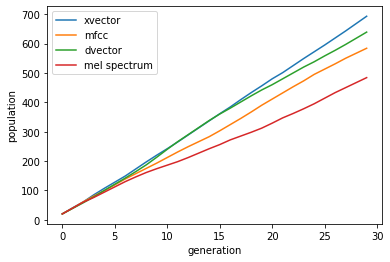

In [93]:
plt.plot(xvector_cnt,label = 'xvector')
plt.plot(mfcc_cnt,label = 'mfcc')
plt.plot(dvector_cnt,label = 'dvector')
plt.plot(mel_cnt,label = 'mel spectrum')
# plt.xlim((0,50))
# plt.ylim((0,50 * Maxiteration))
plt.xlabel("generation")
plt.ylabel("population")
plt.legend(loc = 'upper left')
plt.show()
# for i in range(popsize):
#         temp = temp + population[i].fitval
#         value.append(temp)
# for i in range(popsize - KeepGood):
#         num = random.uniform(value[0],value[popsize - 1])
#         for each in range(popsize):
#             if num <= value[each]:
#                 newpop.append(population[each])
#                 break
# newpop[19].fitval
# population = newpop.copy()

# for i in range(KeepGood):
#         newpop.append(population[i])


In [27]:
def trans_wav_mp3(file_path):
    """
    将wav文件转为mp3文件，保存到cmu_mp3
    """
    for i in range(len(os.listdir(file_path))):
        sourcefile = AudioSegment.from_wav(file_path + os.listdir(file_path)[i])
        #filename = file_path.split('/')[-1].split('.wav')[0].replace(' ', '_') + '.mp3'
        filename = os.listdir(file_path)[i].split('/')[-1].split('.wav')[0] + '.mp3'
        save_path = "/mnt/data/Chenpinji/mp3/mel_Gen1000/"
        print(filename)
        sourcefile.export(save_path + filename, format="mp3")

In [28]:

trans_wav_mp3('/mnt/data/Chenpinji/Generate_Adv/mel_Gen1000/')

melGen_90.mp3
melGen_80.mp3
melGen_28.mp3
melGen_65.mp3
melGen_66.mp3
melGen_125.mp3
melGen_109.mp3
melGen_51.mp3
melGen_107.mp3
melGen_164.mp3
melGen_35.mp3
melGen_4.mp3
melGen_86.mp3
melGen_40.mp3
melGen_62.mp3
melGen_45.mp3
melGen_171.mp3
melGen_102.mp3
melGen_127.mp3
melGen_121.mp3
melGen_195.mp3
melGen_54.mp3
melGen_92.mp3
melGen_165.mp3
melGen_100.mp3
melGen_59.mp3
melGen_98.mp3
melGen_146.mp3
melGen_78.mp3
melGen_11.mp3
melGen_167.mp3
melGen_188.mp3
melGen_9.mp3
melGen_191.mp3
melGen_159.mp3
melGen_0.mp3
melGen_46.mp3
melGen_99.mp3
melGen_186.mp3
melGen_87.mp3
melGen_36.mp3
melGen_70.mp3
melGen_15.mp3
melGen_177.mp3
melGen_179.mp3
melGen_75.mp3
melGen_122.mp3
melGen_112.mp3
melGen_33.mp3
melGen_84.mp3
melGen_162.mp3
melGen_32.mp3
melGen_56.mp3
melGen_141.mp3
melGen_96.mp3
melGen_144.mp3
melGen_10.mp3
melGen_30.mp3
melGen_52.mp3
melGen_151.mp3
melGen_63.mp3
melGen_73.mp3
melGen_173.mp3
melGen_24.mp3
melGen_130.mp3
melGen_27.mp3
melGen_39.mp3
melGen_129.mp3
melGen_106.mp3
melGen_1